<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Johan_Mazorra__LS_DS13_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

# We're going to start by creating a function for the Bayesian approach.

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  prob_drunk_prior = (prob_drunk_prior)
  false_positive_rate = (false_positive_rate)

  inverse_drunk_prior = 1 - prob_drunk_prior

  prob_numer = 1 * prob_drunk_prior

  prob_denom = 1 * (prob_drunk_prior) + (false_positive_rate) * (inverse_drunk_prior)

  probability = prob_numer / prob_denom
  return probability

In [43]:
# Now let's test if the function is working properly.
# I also added a while loop to save time.
prob_actually_drunk = (1/1000)
while prob_actually_drunk <= 0.95:
  prob_previous = prob_actually_drunk
  prob_actually_drunk = prob_drunk_given_positive(prob_actually_drunk, .08)
  print(f"Test 1: {prob_actually_drunk}")
  break

Test 1: 0.012357884330202669


In [84]:
prob_actually_drunk = (1/1000)
while prob_actually_drunk <= 0.95:
  prob_previous = prob_actually_drunk
  prob_actually_drunk = prob_drunk_given_positive(prob_actually_drunk, .08)
  prob_actually_drunk2 = prob_drunk_given_positive(prob_actually_drunk, .08)
  print(f"Test 2: {prob_actually_drunk2}")
  break

Test 2: 0.13525210993291495


In [85]:
prob_actually_drunk = (1/1000)
while prob_actually_drunk <= 0.95:
  prob_previous = prob_actually_drunk
  prob_actually_drunk2 = prob_drunk_given_positive(prob_actually_drunk2, .08)
  prob_actually_drunk3 = prob_drunk_given_positive(prob_actually_drunk2, .08)
  print(f"Test 3: {prob_actually_drunk2}")
  break

Test 3: 0.6615996951348605


In [86]:
prob_actually_drunk = (1/1000)
while prob_actually_drunk <= 0.95:
  prob_previous = prob_actually_drunk
  prob_actually_drunk3 = prob_drunk_given_positive(prob_actually_drunk2, .08)
  prob_actually_drunk4 = prob_drunk_given_positive(prob_actually_drunk2, .08)
  print(f"Test 4: {prob_actually_drunk3}")
  break

# Everything seems to be in order.

Test 4: 0.9606895076105054


# Part 2: Exploring `scipy.stats.bayes_mvs`

In [163]:
# We're going to begin by importing all the needed libraries and by generating the coin flips.

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

coinflips = np.random.binomial(n=3, p=.5, size=20)

results = []
results_y = []

bayes, _, _ = stats.bayes_mvs(coinflips, alpha=.95)

bayes = pd.DataFrame(bayes).T

bayes.columns = ['stat', 'extremum']

bayes

,stat,extremum
0,1.35,"(1.00125446898129, 1.6987455310187103)"


In [192]:
# We're going to set a function for the Frequentist approach so we can illustrate
# the difference in the box plot. Also I'm going to give it a different confidence
# level to get other lower and higher bounds.
def fc(sample, confidence=.99):
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  stddev = np.std(sample, ddof=1)/np.sqrt(n)
  var = stddev**2
  t = stats.t.ppf((1+confidence)/2.0, n-1)
  moe = t * stddev
  low = mean - moe
  high = mean + moe
  returnframe = pd.DataFrame({'stat':[mean],'extremum':[(low, high)]})
  return returnframe

fc = fc(coinflips)

fc

,stat,extremum
0,1.35,"(0.8733030616945017, 1.8266969383054985)"


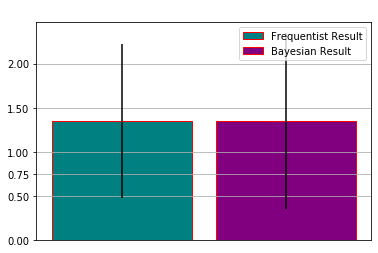

In [199]:
# Now we're going to create the box plot to illustrate the difference which if
# analyzing there is no major difference.
fig, ax = plt.subplots()

plt.title('Comparison', color='white', fontname='Serif', fontweight='bold')
ax.bar([-0.07], fc.stat, yerr=fc.extremum, color='teal',edgecolor='red',linewidth=1, width=0.12, label='Frequentist Result')
ax.bar([0.07], bayes.stat, yerr=bayes.extremum,color='purple',edgecolor='red',linewidth=1, width=0.12, label='Bayesian Result')

ax.set_xticks([3])
ax.set_xticklabels(['Mean'])

ax.set_yticks([0,0.5,0.75,1,1.5,2])

ax.grid(b=True)

ax.legend(loc='best')

plt.show()

# **Part 3: Difference between Bayesian and Frequentist Statistics**

The main difference among Bayesian and Frequentist Statistics is in how probability is utilized. Frequentists use probability just to display certain procedures comprehensively portrayed as examining. Bayesians use likelihood all the more generally to display both inspecting and different sorts of vulnerability.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!